# Confusion matrix and data imbalances

For example, if we are trying to detect cancer but only 1 in 100,000 tissue samples actually contain cancer, a model that always says “no cancer” will have an excellent log-loss (cost), but will be completely useless in the clinic. Choosing more-intelligent ways to assess models is important so that you can get a proper understanding as to how your model will work in the real world.

Each cell in the confusion matrix tells us one thing about the model’s performance. These are True Negatives (TN), False Negatives (FN), False Positives (FP) and True Positives (TP).

TN and TP and correcet predictions, i,e actual label is T and the model predicts T, actual label is F and the model predicts F

In [2]:
import pandas as pd 

#Import the data from the .csv file
dataset = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/snow_objects.csv', delimiter="\t")
dataset

,size,roughness,color,motion,label
0,50.959361,1.318226,green,0.054290,tree
1,60.008521,0.554291,brown,0.000000,tree
2,20.530772,1.097752,white,1.380464,tree
3,28.092138,0.966482,grey,0.650528,tree
4,48.344211,0.799093,grey,0.000000,tree
...,...,...,...,...,...
2195,1.918175,1.182234,white,0.000000,animal
2196,1.000694,1.332152,black,4.041097,animal
2197,2.331485,0.734561,brown,0.961486,animal
2198,1.786560,0.707935,black,0.000000,animal


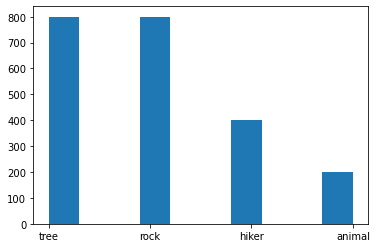

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Plot a histogram of "delta_fvc" for grp 1
ax.hist(dataset["label"])

# Compare to histogram of "delta_fvc" for group 0
#ax.hist(d_ipf_0["delta_fvc"])

# Set the x-axis label to "Weight (kg)"
#ax.set_xlabel("fvc (m)")

# Set the y-axis label to "# of observations"
#ax.set_ylabel("# of observations")

plt.show()

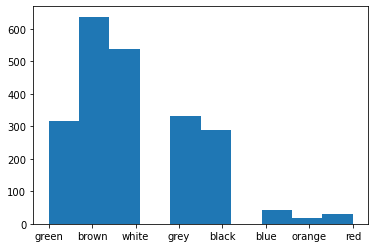

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Plot a histogram of "delta_fvc" for grp 1
ax.hist(dataset["color"])

plt.show()

Let's do some quick data exploration and see what different label classes we have and their respective counts:

The histogram above makes it very easy to understand both the labels we have in the dataset and their distribution.

One important information to notice is that this is an imbalanced dataset: classes are not represented in the same proportion (we have 4 times more rocks and trees than animals, for example).

This is relevant as imbalanced sets are very common "in the wild", and in the future we will learn how to address that to build better models.

We can do the same analisys for the color feature

We can notice that:

We have 8 different color categories.
The color feature is also heavily imbalanced

In [ ]:
# Use box plot to explore the contiuuos variables

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=2)
print(train.shape)
print(test.shape)

(1540, 5)
(660, 5)


In [7]:
# Create the model
model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

# Define which features are to be used (leave color out for now)
features = ["size", "roughness", "motion"]

# Train the model
model.fit(train[features], train.label)

print("Model trained!")

Model trained!


# Assessing our model
We can now use our newly trained model to make predictions using the test set.

By comparing the values predicted to the actual labels (also called true values), we can measure the model's performance using different metrics.

Accuracy, for example, is the simply number of correctly predicted labels out of all predictions performed

In [8]:
# Import a function that measures a models accuracy
from sklearn.metrics import accuracy_score

# Calculate the model's accuracy on the TEST set
actual = test.label
predictions = model.predict(test[features])

# Return accuracy as a fraction
acc = accuracy_score(actual, predictions)

# Return accuracy as a number of correct predictions
acc_norm = accuracy_score(actual, predictions, normalize=False)

print(f"The random forest model's accuracy on the test set is {acc:.4f}.")
print(f"It correctly predicted {acc_norm} labels in {len(test.label)} predictions.")

The random forest model's accuracy on the test set is 0.8924.
It correctly predicted 589 labels in 660 predictions.


Our model seems to be doing quite well!

That intuition, however, can be misleading:

Accuracy does not take into account the wrong predictions made by the model

It's also not very good at painting a clear picture in class-imbalanced datasets, like ours, where the number of possible classes is not evenly distributed (recall that we have 800 trees, 800 rocks, but only 200 animals)

# Building a confusion matrix

In [9]:
# sklearn has a very convenient utility to build confusion matrices
from sklearn.metrics import confusion_matrix

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
cm = confusion_matrix(actual, predictions, normalize=None)

print("Confusion matrix for the test set:")
print(cm)

Confusion matrix for the test set:
[[ 28  38   0   0]
 [ 30 103   1   0]
 [  0   1 217   1]
 [  0   0   0 241]]


In [11]:
pip install plotly

     |████████████████████████████████| 23.9 MB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
#While the matrix above can be useful in calculations, it's not very helpful or intuitive.

#Let's add a plot with labels and colors to turn that data into actual insights


# We use plotly to create plots and charts
import plotly.figure_factory as ff

# Create the list of unique labels in the test set, to use in our plot
# I.e., ['animal', 'hiker', 'rock', 'tree']
x = y = sorted(list(test["label"].unique()))

# Plot the matrix above as a heatmap with annotations (values) in its cells
fig = ff.create_annotated_heatmap(cm, x, y)

# Set titles and ordering
fig.update_layout(  title_text="<b>Confusion matrix</b>", 
                    yaxis = dict(categoryorder = "category descending"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted label",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="Actual label",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# We need margins so the titles fit
fig.update_layout(margin=dict(t=80, r=20, l=100, b=50))
fig['data'][0]['showscale'] = True
fig.show()

Notice that the plot has the Actual labels on the y-axis and Predicted labels on the x-axis, as defined by the confusion_matrix function call.

Let's go over the cells in the top row, left to right, to understand what the plot is telling us:

The first cell means we had 28 animals (the real value) and our model predicted we had 28 animals (the prediction). Those are all TPs or true positives.
However,

The second cell indicates the model incorrectly classified 38 animals as hikers (thus 38 FNs or false negatives in that cell). That doesn't look good!
Third and fourth cells are correct: they each have 0 animals classified as rocks or trees (thus 0 false negatives).
Now, onto the second row from the top:

First cell has 30 hikers classified as animals; In this case we have 30 FPs or false positives in that cell.
In the second cell we have 103 hikers correctly classified (TPs or true positives)
In the third cell we have 1 hiker classified as a rock! (1 FN)
Finally, in the fourth cell we have 0 hikers classified as trees (meaning 0 FNs)
If we go over the same process for the remaining rows, we can see that the model is generally accurate, but only because we have so many rocks and trees in our set and because it does well on those classes.

When it comes to hikers and animals the model gets confused (it shows a high number of FPs and FNs), but because these classes are less represented in the dataset the accuracy score remains high.

# Data Imbalances
Our data is imbalanced, because there are vastly different numbers of hikers, animals, trees, and rocks in our training data. We can see this either by tabulating this

For example, if we were trying to predict whether an object is a hiker, animal, tree, or rock, we would ideally want an equal number of all categories, like so

Bias in a confusion matrix

# Bias in a confusion matrix
Confusion matrices are the key to identifying data imbalances or model bias

In an ideal scenario, the test data have an approximately even number of labels, and the predictions made by the model also are approximately spread across the labels.(unbalise data has equal number of TP, TP, FP FN)
We can tell that the input data is unbiased, because the row sums are the same (500 each), indicating that half the labels are ‘true’, and half are ‘false’.imilarly, we can see that the model is giving unbiased responses because it is returning true half the time and false the other half of the time.

By contrast, biased data mostly contains one kind of label, like so

our goal is to have models are accurate and unbiased
we need to ensure our accurate models aren't biased, simply because the data are

# Avoiding the consequences of imbalanced data
Some of the simplest ways to avoid the consequences of imbalanced data are:

Avoid it through better data selection.
‘Resample’ your data so that it contains duplicates of the minority label class.
Make changes to the cost function so that it prioritizes less-common labels. For example if the wrong response is given to Tree, the cost function might return 1, while if the wrong response is made to Hiker it might return 10.
We'll explore these methods in the following exercise

# Using binary classification
For this exercise we will build a binary classification model. We want to predict if objects in the snow are "hikers" or "not-hikers".

To do that, we first need to add another column to our dataset, and set it to True where the original label is hiker, and False to anything else

In [19]:
# Add a new label with true/false values to our dataset
dataset["is_hiker"] = dataset.label == "hiker"
dataset

,size,roughness,color,motion,label,is_hiker
0,50.959361,1.318226,green,0.054290,tree,False
1,60.008521,0.554291,brown,0.000000,tree,False
2,20.530772,1.097752,white,1.380464,tree,False
3,28.092138,0.966482,grey,0.650528,tree,False
4,48.344211,0.799093,grey,0.000000,tree,False
...,...,...,...,...,...,...
2195,1.918175,1.182234,white,0.000000,animal,False
2196,1.000694,1.332152,black,4.041097,animal,False
2197,2.331485,0.734561,brown,0.961486,animal,False
2198,1.786560,0.707935,black,0.000000,animal,False


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

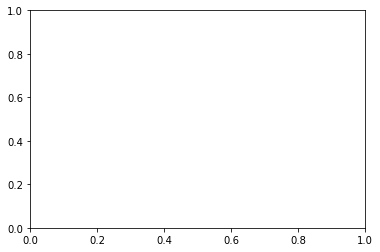

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(dataset["is_hiker"])
plt.show()



We now have only two classes of labels in our dataset, but we have made it even more imbalanced.

Let's train the random forest model using is_hiker as the target variable, then measure its accuracy on both train and test sets

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

# Custom function that measures accuracy on different models and datasets
# We will use this in different parts of the exercise
def assess_accuracy(model, dataset, label):
    """
    Asesses model accuracy on different sets
    """ 
    actual = dataset[label]        
    predictions = model.predict(dataset[features])
    acc = accuracy_score(actual, predictions)
    return acc

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=1, shuffle=True)

# define a random forest model
model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

# Define which features are to be used (leave color out for now)
features = ["size", "roughness", "motion"]

# Train the model using the binary label
model.fit(train[features], train.is_hiker)

print("Train accuracy:", assess_accuracy(model,train, "is_hiker"))
print("Test accuracy:", assess_accuracy(model,test, "is_hiker"))

Train accuracy: 0.9532467532467532
Test accuracy: 0.906060606060606


Accuracy looks good for both train and test sets, but remember that this metric is not an absolute measure of success.

We should plot a confusion matrix to see how the model is actually doing

In [25]:
# sklearn has a very convenient utility to build confusion matrices
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

# Calculate the model's accuracy on the TEST set
actual = test.is_hiker
predictions = model.predict(test[features])

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
cm = confusion_matrix(actual, predictions, normalize=None)

# Create the list of unique labels in the test set, to use in our plot
# I.e., ['True', 'False',]
unique_targets = sorted(list(test["is_hiker"].unique()))

# Convert values to lower case so the plot code can count the outcomes
x = y = [str(s).lower() for s in unique_targets]

# Plot the matrix above as a heatmap with annotations (values) in its cells
fig = ff.create_annotated_heatmap(cm, x, y)

# Set titles and ordering
fig.update_layout(  title_text="<b>Confusion matrix</b>", 
                    yaxis = dict(categoryorder = "category descending")
                    )

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted label",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="Actual label",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# We need margins so the titles fit
fig.update_layout(margin=dict(t=80, r=20, l=120, b=50))
fig['data'][0]['showscale'] = True
fig.show()

The confusion matrix shows us that, despite the reported metrics, the model is not incredibly precise.

Out of the 660 samples present in the test set (30% of the total samples), it predicted 29 false negatives and 33 false positives.

More importantly, look at the bottom row, which shows what happened when the model was shown information about a hiker: it got the answer wrong almost 30% of the time. This means it would not correctly identify almost 30% of the people on the mountain!

What happens if we used this model to make predictions on balanced sets?

Let's load a dataset with an equal number of outcomes for "hikers" and "non-hikers", then use that data to make predictions:

In [26]:
# Load and print umbiased set
#Import the data from the .csv file
balanced_dataset = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/snow_objects.csv', delimiter="\t")

This new dataset is balanced among the classes, but for our purposes we want it balanced between hikers and non-hikers.

For simplicity, let's take the hikers plus a random sampling of the non-hikers

In [28]:
# Add a new label with true/false values to our dataset
balanced_dataset["is_hiker"] = balanced_dataset.label == "hiker"

hikers_dataset = balanced_dataset[balanced_dataset["is_hiker"] == 1] 
nonhikers_dataset = balanced_dataset[balanced_dataset["is_hiker"] == False] 
# take a random sampling of non-hikers the same size as the hikers subset
nonhikers_dataset = nonhikers_dataset.sample(n=len(hikers_dataset.index), random_state=1)
balanced_dataset = pd.concat([hikers_dataset, nonhikers_dataset])

In [ ]:
# plot the balanced dataset fofr hickers and non hickers
#As you can see, the is_hiker label has the same number of True and False 
# for both classes. We are now using a class balanced dataset.

In [29]:
# Test the model using a balanced dataset
actual = balanced_dataset.is_hiker
predictions = model.predict(balanced_dataset[features])

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
cm = confusion_matrix(actual, predictions, normalize=None)

# Print accuracy using this set
print("Balanced set accuracy:", assess_accuracy(model,balanced_dataset, "is_hiker"))

Balanced set accuracy: 0.90125


In [30]:
# plot new confusion matrix
# Create the list of unique labels in the test set to use in our plot
unique_targets = sorted(list(balanced_dataset["is_hiker"].unique()))

# Convert values to lower case so the plot code can count the outcomes
x = y = [str(s).lower() for s in unique_targets]

# Plot the matrix above as a heatmap with annotations (values) in its cells
fig = ff.create_annotated_heatmap(cm, x, y)

# Set titles and ordering
fig.update_layout(  title_text="<b>Confusion matrix</b>", 
                    yaxis = dict(categoryorder = "category descending")
                    )

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted label",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="Actual label",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# We need margins so the titles fit
fig.update_layout(margin=dict(t=80, r=20, l=120, b=50))
fig['data'][0]['showscale'] = True
fig.show()

The confusion matrix confirms the poor accuracy using this dataset, but why is this happening when we had such excellent metrics in the earlier train and test sets?

Recall that the first model was heavily imbalanced. The "hiker" class made up roughly 22% of the outcomes.

When such an imbalance happens, classification models don't have enough data to learn the patterns for the minority class, and as a consequence become biased towards the majority class!

Imbalanced sets can be addressed in a number of ways:

Improving data selection
Resampling the dataset
Using weighted classes
For this exercise, we will focus on the last option

Using class weights to balance dataset
We can assign different weights to the majority and minority classes, according to their distribution, and modify our training algorithm so that it takes that information into account during the training phase.

It will then penalize errors when the minority class is misclassified, in essence "forcing" the model to to better learn their features and patterns.

To use weighted classes, we have to retrain our model using the original train set, but this time telling the algorithm to use weights when calculating errors

In [31]:
# Import function used in calculating weights
from sklearn.utils import class_weight

# Retrain model using class weights
# Using class_weight="balanced" tells the algorithm to automatically calculate weights for us
weighted_model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False, class_weight="balanced")
# Train the weighted_model using binary label
weighted_model.fit(train[features], train.is_hiker)

print("Train accuracy:", assess_accuracy(weighted_model,train, "is_hiker"))
print("Test accuracy:", assess_accuracy(weighted_model, test, "is_hiker"))

Train accuracy: 0.9525974025974026
Test accuracy: 0.9166666666666666


After using the weighted classes, the train accuracy remained almost the same, while the test accuracy showed a small improvement (roughly 1%).

Let's see if results are improved at all using the balanced set for predictions again:

In [32]:
print("Balanced set accuracy:", assess_accuracy(weighted_model, balanced_dataset, "is_hiker"))

# Test the weighted_model using a balanced dataset
actual = balanced_dataset.is_hiker
predictions = weighted_model.predict(balanced_dataset[features])

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
cm = confusion_matrix(actual, predictions, normalize=None)

Balanced set accuracy: 0.91375


# Final confusion matrix
We can now plot a final confusion matrix, representing predictions for a balanced dataset, using a model trained on a weighted class dataset

In [33]:
# Plot the matrix above as a heatmap with annotations (values) in its cells
fig = ff.create_annotated_heatmap(cm, x, y)

# Set titles and ordering
fig.update_layout(  title_text="<b>Confusion matrix</b>", 
                    yaxis = dict(categoryorder = "category descending")
                    )

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted label",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="Actual label",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# We need margins so the titles fit
fig.update_layout(margin=dict(t=80, r=20, l=120, b=50))
fig['data'][0]['showscale'] = True
fig.show()

While the results might look a bit disappointing, we now have 21% wrong predictions (FNs + FPs), against 25% from the previous experiment.

Correct predictions (TPs + TNs) went from 74.7% to 78.7%.

Is an all around 4% improvement significant or not?

Remember that we had relatively little data to train the model, and the features we have available may still be so similar for different samples (for example, hikers and animals tend to be small, non-rough and move a lot), that despite our efforts, the model still has some difficulty making correct predictions.

We only had to change a single line of code to get better results, so it seems worth the effort!

# More metrics derived from confusion matrices

In [34]:
 # Load and print umbiased set
#Import the data from the .csv file
dataset = pd.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/snow_objects.csv', delimiter="\t")



In [35]:
#Recall that to use the dataset above for binary classification, we need to 
#add another column to the dataset, and set it to True where the original label is hiker, 
#and False where it's not.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Add a new label with true/false values to our dataset
dataset["is_hiker"] = dataset.label == "hiker"

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=1, shuffle=True)

# define a random forest model
model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

# Define which features are to be used 
features = ["size", "roughness", "motion"]

# Train the model using the binary label
model.fit(train[features], train.is_hiker)

print("Model trained!")

Model trained!


In [36]:
# sklearn has a very convenient utility to build confusion matrices
#We can now use this model to predict whether objects in the snow are hikers or not.

Let's plot its confusion matrix
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff

# Calculate the model's accuracy on the TEST set
actual = test.is_hiker
predictions = model.predict(test[features])

# Build and print our confusion matrix, using the actual values and predictions 
# from the test set, calculated in previous cells
cm = confusion_matrix(actual, predictions, normalize=None)

# Create the list of unique labels in the test set, to use in our plot
# I.e., ['True', 'False',]
unique_targets = sorted(list(test["is_hiker"].unique()))

# Convert values to lower case so the plot code can count the outcomes
x = y = [str(s).lower() for s in unique_targets]

# Plot the matrix above as a heatmap with annotations (values) in its cells
fig = ff.create_annotated_heatmap(cm, x, y)

# Set titles and ordering
fig.update_layout(  title_text="<b>Confusion matrix</b>", 
                    yaxis = dict(categoryorder = "category descending"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted label",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="Actual label",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# We need margins so the titles fit
fig.update_layout(margin=dict(t=80, r=20, l=120, b=50))
fig['data'][0]['showscale'] = True
fig.show()

In [38]:
# Let's also calculate some values that will be used throughout this exercise
# We already have actual values and corresponding predictions, defined above
import numpy
correct = actual == predictions
tp = numpy.sum(correct & actual)
tn = numpy.sum(correct & numpy.logical_not(actual))
fp = numpy.sum(numpy.logical_not(correct) & actual)
fn = numpy.sum(numpy.logical_not(correct) & numpy.logical_not(actual))

print("TP - True Positives: ", tp)
print("TN - True Negatives: ", tn)
print("FP - False positives: ", fp)
print("FN - False negatives: ", fn)

TP - True Positives:  75
TN - True Negatives:  523
FP - False positives:  29
FN - False negatives:  33


We can use the values and matrix above to help us understand other metrics.

Calculating metrics
From here on we will take a closer look at each at the following metrics, how they are calculated and how they can help explain our current model.

Accuracy
Sensitivity/Recall
Specificity
Precision
False positive rate
Let's first recall some useful terms:

TP = True positives: a positive label is correctly predicted
TN = True nositives: a negative label is correctly predicted
FP = False positives: a negative label is predicted as a positive
FN = False negatives: a positive label is predicted as a negative

# Accuracy
Accuracy is the number of correct predictions divided by the total number of predictions:

    accuracy = (TP+TN) / number of samples
It's possibly the most basic metric used but, as we've seen, it's not the most reliable when imbalanced datasets are used.



In [39]:
# Calculate accuracy
# len(actual) is the number of samples in the set that generated TP and TN
accuracy = (tp+tn) / len(actual) 

# print result as a percentage
print(f"Model accuracy is {accuracy:.2f}%")

Model accuracy is 0.91%


# Sensitivity/Recall
Sensitivity and Recall are interchangeable names for the same metric, which expresses the fraction of samples correctly predicted by a model:

    sensitivity = recall = TP / (TP + FN)
This is an important metric, that tells us how out of all the existing positive samples, how many are correctly predicted

In [40]:
# code for sensitivity/recall
sensitivity = recall = tp / (tp + fn)

# print result as a percentage
print(f"Model sensitivity/recall is {sensitivity:.2f}%")

Model sensitivity/recall is 0.69%


# Specificity
Specificity expresses the fraction of negative labels correctly predicted over the total number of existing negative samples:

    specificity = TN / (TN + FP)

In [41]:
# Code for specificity
specificity = tn / (tn + fp)

# print result as a percentage
print(f"Model specificity is {specificity:.2f}%")

Model specificity is 0.95%


# Precision
Precision expresses the proportion of correctly predicited positive samples over all positive predictions:

    precision = TP / (TP + FP)
In other words, it indicates how out of all positive predictions, how many are trully positive labels.


In [42]:
# Code for precision

precision = tp / (tp + fp)

# print result as a percentage
print(f"Model precision is {precision:.2f}%")

Model precision is 0.72%


# False positive rate
False positive rate or FPR, is the number of incorrect positive predictions divided by the total number of negative samples:

    false_positive_rate = FP / (FP + TN

In [43]:
# Code for false positive rate
false_positive_rate = fp / (fp + tn)

# print result as a percentage
print(f"Model false positive rate is {false_positive_rate:.2f}%")

Model false positive rate is 0.05%


# Measure and optimize model performance with ROC and AUC

Receiver operator characteristic curves are a powerful way to assess and fine-tune trained classification models. We introduce and explain the utility of these curves through learning content and practical exercises

Understand how to create ROC curves
Explore how to assess and compare models using these curves
Practice fine-tuning a model using characteristics plotted on ROC curves

We can assess our classification models in terms of the kinds of mistakes that they make, such as false negatives and false positives. This can give insight into the kinds of mistakes a model makes but doesn't necessarily give deep information on how the model could perform if slight adjustments were made to its decision criteria. Here we'll discuss receiver operator characteristic (ROC) curves, which build on the idea of a confusion matrix but provide us with deeper information that lets us improve our models to a greater degree



Your avalanche-rescue charity has successfully built a machine learning model that can estimate whether an object detected by lightweight sensors is a hiker or a natural object, such as a tree or rock. This lets you keep track of how many people are on the mountain, so you know whether a rescue team is needed when an avalanche strikes. The model does reasonably well, though you wonder if there's room for improvement. Internally, the model must make a binary decision as to whether an object is a hiker or not, but this is based on probabilities. Can this decision-making process be tweaked to improve its performance

# Analyze classification with receiver operator characteristic curves

Classification models must assign a sample to a category. 

We can improve classification models many ways, e,g we can ensure our data are balanced, clean, and scaled, We can also alter our model architecture, and use hyperparameters to squeeze as much performance as we possibly can out of our data and architecture. 

but a final simple step can be used to further improve how well our model works


# Probabilities and categories
Many models have multiple decision-making stages, and the final one often is simply a binarization step. During binarization, probabilities are converted into a hard label. For example, let’s say that the model is provided with features and calculates that there's a 75% chance that it was shown a hiker, and 25% chance it was shown a tree.As such, the model applies a threshold, which is normally 50%. As the hiker class is larger than 50%, the object is declared to be a hiker.

The 50% threshold is logical – it means that the most likely label according to the model is always chosen. If the model is biased, however, this 50% threshold might not be appropriate. For example, if the model has a slight tendency to pick trees more than hikers – picking trees 10% more frequently than it should – we could adjust our decision threshold to account for this

# Decision matrices
are a great way to assess the kinds of mistakes a model is making. This gives us the rates of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)


# True Positive Rate (sensitivity):
how often ‘True’ labels are correctly identified as ‘True’. For example, how often the model predicts ‘hiker’ when the sample it's shown is in fact a hiker.

# False Positive Rate (false alarm rate):
how often ‘False’ labels are incorrectly identified as ‘True’. For example, how often the model predicts ‘Hiker’ when it's shown a tree.
# Looking at true positive and false positive rates can help us understand a model’s performance

Consider our hiker example. Ideally, the true positive rate is very high, and the false positive rate is very low, because this means that the model identifies hikers well, and doesn’t identify trees as hikers very often. Yet, if the true positive rate is very high, but the false positive rate is also very high, then the model is biased: it's identifying almost everything it encounters as hiker. Similarly, we don’t want a model with a low true positive rate, because then when the model encounters a hiker, it'll label them as a tree

# ROC curves
Receiver operator characteristic (ROC) curves are a graph where we plot true positive rate versus false positive rate

However, remember that our models have a threshold—normally 50%—that is used to decide whether the true (hiker) or false (tree) label should be used. If we change this threshold to 30% and recalculate true positive and false positive rates, we get another point:

Remember that we want a high true positive rate (identifying hikers as such) and a low false positive rate (not identifying trees as hikers)


In [46]:

import sklearn.model_selection


df = pd.read_csv("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/hiker_or_tree.csv", delimiter="\t")

# Split into train and test
train, test =  sklearn.model_selection.train_test_split(df, test_size=0.5, random_state=1)



In [54]:
# visualisation
# produce a graph showing a count of the features split buy the outcome(0/1) to analyse the distribution
df

,height,is_hiker,motion,texture
0,2.106086,1,1.846764,5.244758
1,1.547061,1,0.000000,5.119398
2,1.567957,1,2.507984,4.775944
3,1.431758,1,1.675968,4.694602
4,1.916352,1,0.488923,3.985027
...,...,...,...,...
995,6.906845,0,0.094291,4.614055
996,5.178162,0,0.280459,4.688672
997,6.944300,0,0.460830,4.924670
998,7.283096,0,0.323688,4.299989


(array([  5.,  18.,  56., 105., 149., 112.,  47.,   6.,   0.,   2.]),
 array([ 4.5569885 ,  5.11797786,  5.67896723,  6.2399566 ,  6.80094596,
         7.36193533,  7.9229247 ,  8.48391406,  9.04490343,  9.6058928 ,
        10.16688216]),
 <BarContainer object of 10 artists>)

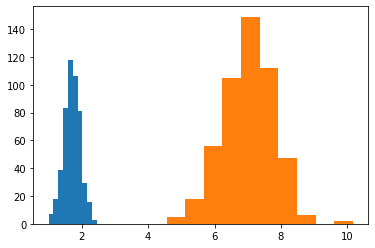

In [56]:
hiker = df[df['is_hiker'] == 1]

not_hiker = df[df['is_hiker'] == 0]

fig, ax = plt.subplots()
# Plot a histogram of "delta_fvc" for grp 1
ax.hist(hiker["height"])

# Compare to histogram of "delta_fvc" for group 0
ax.hist(not_hiker["height"])

(array([122., 114.,  92.,  68.,  57.,  30.,  12.,   3.,   1.,   1.]),
 array([5.27384971e-04, 1.72107818e-01, 3.43688251e-01, 5.15268684e-01,
        6.86849117e-01, 8.58429550e-01, 1.03000998e+00, 1.20159042e+00,
        1.37317085e+00, 1.54475128e+00, 1.71633172e+00]),
 <BarContainer object of 10 artists>)

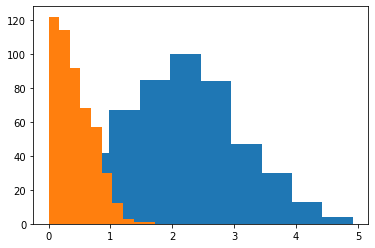

In [57]:
fig, ax = plt.subplots()
# Plot a histogram of "delta_fvc" for grp 1
ax.hist(hiker["motion"])

# Compare to histogram of "delta_fvc" for group 0
ax.hist(not_hiker["motion"])

(array([ 10.,  26.,  72.,  95., 113.,  96.,  60.,  21.,   4.,   3.]),
 array([3.75055286, 4.03224994, 4.31394702, 4.5956441 , 4.87734119,
        5.15903827, 5.44073535, 5.72243243, 6.00412951, 6.28582659,
        6.56752367]),
 <BarContainer object of 10 artists>)

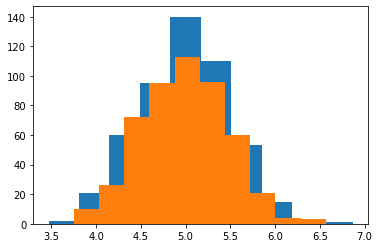

In [58]:
fig, ax = plt.subplots()
# Plot a histogram of "delta_fvc" for grp 1
ax.hist(hiker["texture"])

# Compare to histogram of "delta_fvc" for group 0
ax.hist(not_hiker["texture"])

#We can see that we should be able to use height to separate hikers from trees quite easily. Motion will be slightly more difficult, presumably because trees blow in the wind, and some hikers are found sitting down. Texture seems much the same for hikers and trees.

# A perfect model
it would calculate "0% chance of hiker" when it saw any tree and "100% of hiker" when it saw any hiker. 
Between these thresholds, the true positive rate would always be 1, and the false positive rate would always be 0.

 At 0 we are forcing a model to return a False value and at 1 we are forcing it to return True.

It's almost impossible to train a model that is so perfect, but for the sake of learning, let's pretend we have done so, predicting the is_hiker label based on height.

In [59]:
import statsmodels.api

# Create a fake model that is perfect at predicting labels
class PerfectModel:
    def predict(self, x):
        # The perfect model believes that hikers are all
        # under 4m tall
        return 1 / (1 + numpy.exp(80*(x - 4)))
    
model = PerfectModel()

# Plot the model
# this graph doesnt work as graphing is a customised function, so graph is not displayed
#import graphing
#graphing.scatter_2D(test, trendline=model.predict)

# Remember than an ROC curve plots the true positive rate (TPR) against the false positive rate (FPR). Let's make a function that can calculate these for us

In [60]:
def calculate_tpr_fpr(prediction, actual):
    '''
    Calculates true positive rate and false positive rate

    prediction: the labels predicted by the model
    actual:     the correct labels we hope the model predicts
    '''

    # To calculate the true positive rate and true negative rate we need to know
    # TP - how many true positives (where the model predicts hiker, and it is a hiker)
    # TN - how many true negatives (where the model predicts tree, and it is a tree)
    # FP - how many false positives (where the model predicts hiker, but it was a tree)
    # FN - how many false negatives (where the model predicts tree, but it was a hiker)

    # First, make a note of which predictions were 'true' and which were 'false'
    prediction_true = numpy.equal(prediction, 1)
    prediction_false= numpy.equal(prediction, 0)

    # Now, make a note of which correct results were 'true' and which were 'false'
    actual_true = numpy.equal(actual, 1)
    actual_false = numpy.equal(actual, 0)

    # Calculate TP, TN, FP, and FN
    # The combination of sum and '&' counts the overlap
    # For example, TP calculates how many 'true' predictions 
    # overlapped with 'true' labels (correct answers)
    TP = numpy.sum(prediction_true  & actual_true)
    TN = numpy.sum(prediction_false & actual_false)
    FP = numpy.sum(prediction_true  & actual_false)
    FN = numpy.sum(prediction_false & actual_true)

    # Calculate the true positive rate
    # This is the proportion of 'hiker' labels that are identified as hikers
    tpr = TP / (TP + FN)

    # Calculate the false positive rate 
    # This is the proportion of 'tree' labels that are identified as hikers
    fpr = FP / (FP + TN)

    # Return both rates
    return tpr, fpr

print("Ready!")

Ready!


Now remember that to make an ROC curve, we calculate TPR and FPR for a wide range of thresholds. We then plot the TPR on the y-axis and the FPR on the x-axis.

First, lets make a short method that can calculate the TPR and FPR for just one decision threshold.

In [61]:
def assess_model(model_predict, feature_name, threshold):
    '''
    Calculates the true positive rate and false positive rate of the model
    at a particular decision threshold

    model_predict: the model's predict function
    feature_name: the feature the model is expecting
    threshold: the decision threshold to use 
    '''

    # Make model predictions for every sample in the test set
    # What we get back is a probability that the sample is a hiker
    # For example, if we had two samples in the test set, we might
    # get 0.45 and 0.65, meaning the model says there is a 45% chance
    # the first sample is a hiker, and 65% chance the second is a 
    # hiker
    probability_of_hiker = model_predict(test[feature_name])
    
    # See which predictions at this threshold would say hiker
    predicted_is_hiker = probability_of_hiker > threshold

    # calculate the true and false positives rates using our
    # handy method
    return calculate_tpr_fpr(predicted_is_hiker, test.is_hiker)

print("Ready!")

Ready!


Now we can use it in a loop to create an ROC curve:

In [67]:
def create_roc_curve(model_predict, feature="height"):
    '''
    This function creates a ROC curve for a given model by testing it
    on the test set for a range of decision thresholds. An ROC curve has
    the True Positive rate on the x-axis and False Positive rate on the 
    y-axis

    model_predict: The model's predict function
    feature: The feature to provide the model's predict function
    '''

    # Calculate what the true positive and false positive rate would be if
    # we had used different thresholds. 

    #  Make a list of thresholds to try
    thresholds = numpy.linspace(0,1,101)

    false_positive_rates = []
    true_positive_rates = []

    # Loop through all thresholds
    for threshold in thresholds:
        # calculate the true and false positives rates using our
        # handy method
        tpr, fpr = assess_model(model_predict, feature, threshold)

        # save the results
        true_positive_rates.append(tpr)
        false_positive_rates.append(fpr)


    # Graph the result
    # You don't need to understand this code, but essentially we are plotting
    # TPR versus FPR as a line plot
    # -- Prepare a dataframe, required by our graphing code
    df_for_graphing = pandas.DataFrame(dict(fpr=false_positive_rates, tpr=true_positive_rates, threshold=thresholds))
    
    
    # -- Generate the plot
    #'this graph doesnt work here as graphing was a customised fuinction
    #fig = graphing.scatter_2D(df_for_graphing, x_range=[-0.05,1.05])
    #fig.update_traces(mode='lines') # Comment our this line if you would like to see points rather than lines
   # fig.update_yaxes(range=[-0.05, 1.05])

    # Display the graph
    #fig.show()


# Create an roc curve for our model
#create_roc_curve(model.predict)

# NB, the generate plot section of the code doiesnt work here because of the graphing package not installed


# adding a trendline to a curve

import statsmodels.api

#Train a logistic regression model to predict hiker based on motion
model = statsmodels.api.Logit(train.is_hiker, prep_data(train.motion), add_constant=True).fit()

#Plot the model
graphing.scatter_2D(test, label_x="motion", label_y="is_hiker", trendline=lambda x: model.predict(prep_data(x)))

# Compare and optimize ROC curves

Receiver operator characteristic (ROC) curves let us compare models to one another and tune our selected model. Let’s discuss how and why these are done.

Tuning a model

# Compare and optimize ROC curves

Receiver operator characteristic (ROC) curves let us compare models to one another and tune our selected model. Let’s discuss how and why these are done.

Tuning a model
The most obvious use for an ROC curve is to choose a decision threshold that gives the best performance. Recall that our models provide us with probabilities, such as a 65% chance that the sample is a hiker. The decision threshold is the point above which a sample is assigned true (hiker) or below which it's assigned false (tree). If our decision threshold was 50%, then 65% would be assigned to ‘true’ (hiker). If our decision threshold was 70%, however, a probability of 65% would be too small, and be assigned to false (‘tree’).

We’ve seen in the previous exercise that when we construct an ROC curve, we're just changing the decision threshold and assessing how well the model works. When we do this, we can find the threshold that gives the optimal results.

Usually there isn't a single threshold that gives both the best true positive rate (TPR) and the lower false positive rate (FPR). This means that the optimal threshold depends on what you are trying to achieve. For example, in our scenario, it’s very important to have a high true positive rate because if a hiker isn't identified and an avalanche occurs the team won't know to rescue them. There's a trade-off, though – if the false positive rate is too high, then the rescue team may repeatedly be sent out to rescue people who simply don't exist. In other situations, the false positive rate is considered more important. For example, science has a low tolerance for false-positive results – if the false-positive rate of scientific experiments was higher, there would be an endless flurry of contradictory claims and it would be impossible to make sense of what is real.

Comparing models with AUC
ROC curves can be used to compare models to each other, just like cost functions can. ROC curve for a model shows how well it will work for a variety of decision thresholds. At the end of the day, what is most important in a model is how it will perform in the real world – where there's only one decision threshold. Why then, would we want to compare models using thresholds we'll never use? There are two answers for this.

Firstly, comparing ROC curves in particular ways is like performing a statistical test that tells us not just that one model did better on this particular test set, but whether it's likely to continue to perform better in the future. This is out of the scope of this learning material, but it's worth keeping in mind.

Secondly, the ROC curve shows, to some degree, how reliant the model is on having the perfect threshold. For example, if our model only works well when we have a decision threshold of 0.9, but terribly above or below this value, it's not a good design. We would probably prefer to work with a model that works reasonably well for various thresholds, knowing that if the real-world data we come across is slightly different to our test set, our model’s performance won't necessarily collapse.

How to compare ROCs?
The easiest way to compare ROCs numerically is using the area under the curve (AUC). Literally, this is the area of the graph that is below the curve. For example, our perfect model from the last exercise has an AUC of 1:

# Tune the area under the curve
In this exercise, we will make and compare two models, using ROC curves, and tune one using the area under the curve (AUC).

The goal of our models is to identify whether each item detected on the mountain is a hiker (true) or a tree (false)

In [68]:
# Remove features we no longer want
del df["height"]
del df["texture"]

# Split into train and test
train, test =  sklearn.model_selection.train_test_split(df, test_size=0.5, random_state=1)



# A logistic regression model and a random forest
Let's train the same logistic regression model we used in the previous exercise, as well as a random forest model. Both will try to predict which objects are hikers.

In [71]:
import statsmodels.api
from sklearn.metrics import accuracy_score

# This is a helper method that reformats the data to be compatible
# with this particular logistic regression model 
prep_data = lambda x:  numpy.column_stack((numpy.full(x.shape, 1), x))

# Train a logistic regression model to predict hiker based on motion
lr_model = statsmodels.api.Logit(train.is_hiker, prep_data(train.motion), add_constant=True).fit()

# Assess its performance
# -- Train
predictions = lr_model.predict(prep_data(train.motion)) > 0.5
train_accuracy = accuracy_score(train.is_hiker, predictions)

# -- Test
predictions = lr_model.predict(prep_data(test.motion)) > 0.5
test_accuracy = accuracy_score(test.is_hiker, predictions)

print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

# Plot the model
predict_with_logistic_regression = lambda x: lr_model.predict(prep_data(x))
predict_with_logistic_regression
#graphing.scatter_2D(test, label_x="motion", label_y="is_hiker", title="Logistic Regression", trendline=predict_with_logistic_regression)

Optimization terminated successfully.
         Current function value: 0.260202
         Iterations 8
Train accuracy 0.916
Test accuracy 0.888


<function __main__.<lambda>(x)>

# Now random forest model


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest model with 50 trees
random_forest = RandomForestClassifier(random_state=2,
                                       verbose=False)

# Train the model
random_forest.fit(train[["motion"]], train.is_hiker)

# Assess its performance
# -- Train
predictions = random_forest.predict(train[["motion"]])
train_accuracy = accuracy_score(train.is_hiker, predictions)

# -- Test
predictions = random_forest.predict(test[["motion"]])
test_accuracy = accuracy_score(test.is_hiker, predictions)


# Train and test the model
print("Random Forest Performance:")
print("Train accuracy", train_accuracy)
print("Test accuracy", test_accuracy)

Random Forest Performance:
Train accuracy 1.0
Test accuracy 0.852


In [73]:
# https://docs.microsoft.com/en-us/learn/modules/optimize-model-performance-roc-auc/5-tune-auc-curves

# complete this tutorial 


from m2d_make_roc import create_roc_curve # import our previous ROC code

fig, thresholds_lr = create_roc_curve(predict_with_logistic_regression, test, "motion")

# Uncomment the line below if you would like to see the area under the curve
#fig.update_traces(fill="tozeroy")

fig.show()

# Show the table of results
thresholds_lr

ModuleNotFoundError: No module named 'm2d_make_roc'